In [236]:
#importing parkages
import pandas as pd 
import numpy as np

# Import Scikit-learn helper functions

#for Data Segementation
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metric functions
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

#for visualizations
import seaborn as sns
#to shut warnings from the notebook
import warnings
warnings.filterwarnings('ignore')

In [237]:
data = pd.read_csv('data.csv')
data =data.sample(frac = 1)
data = data.fillna(0)
data = data.reset_index(drop = True)
data.head()

,src_ip,src_port,dest_ip,dest_port,protocol,class
0,59.127.74.230,45728.0,172.25.0.2,23.0,telnet,cowrie
1,185.180.143.164,60790.0,172.31.86.174,9002.0,tcp,honeytrap
2,172.31.86.174,47508.0,52.20.78.240,443.0,TCP,suricata
3,172.31.86.174,23.0,114.228.102.195,46004.0,TCP,suricata
4,192.241.201.182,44994.0,172.31.86.174,8888.0,tcp,honeytrap


In [238]:
src_ip = []
dest_ip = []
def ip_clean(x):
    for i in x.src_ip:
        src_ip.append(int(i.replace('.','')))
    for i in x.dest_ip:
        dest_ip.append(int(str(i).replace('.','')))
ip_clean(data)

In [239]:
data['src_ip'] = src_ip
data["dest_ip"] = dest_ip

In [240]:
X = data.loc[ : ,:'protocol']
X= X.fillna(0)
y = data['class']

dataset = X
# change strings to categories
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype('category').cat.as_ordered()
# Turn the categorical columns to numbers and then fill missing
for label, content in X.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn the categories to number and fill missing values with +1 , we are adding +1 because pandas see missing as -ve
        X[label] = pd.Categorical(content).codes + 1
# X["src_ip"], X['dest_ip'] = data['src_ip'],data['dest_ip']
# X= X.fillna(0)

In [241]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [242]:
print(X), print(y)

            src_ip  src_port       dest_ip  dest_port  protocol
0       5912774230   45728.0       1722502       23.0        23
1     185180143164   60790.0    1723186174     9002.0        22
2       1723186174   47508.0     522078240      443.0         2
3       1723186174      23.0  114228102195    46004.0         2
4     192241201182   44994.0    1723186174     8888.0        22
...            ...       ...           ...        ...       ...
6789  211198104195   53794.0       1722502       23.0        23
6790  192241212108   48198.0    1723186174     5901.0        22
6791    1723186174    9200.0  192241210210    50244.0         2
6792    1723186174     445.0   20521031139    57610.0         2
6793    2201301944   55470.0       1722502       23.0        23

[6794 rows x 5 columns]
0          cowrie
1       honeytrap
2        suricata
3        suricata
4       honeytrap
          ...    
6789       cowrie
6790    honeytrap
6791     suricata
6792     suricata
6793       cowrie
Name: cla

(None, None)

In [243]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [244]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
seed = 7

scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('Linear Regrssion', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NN', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
std =[]
for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits=10)
    cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    std.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Linear Regrssion: 0.659939 (0.015936)
KNN: 0.948267 (0.009115)
Decision Tree: 0.999159 (0.001030)
NN: 0.586189 (0.114203)


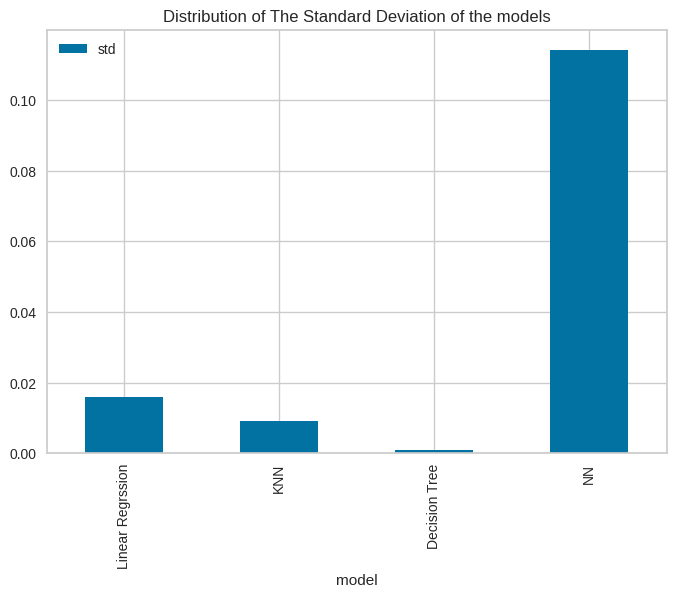


The Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model
Decision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting
The KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%


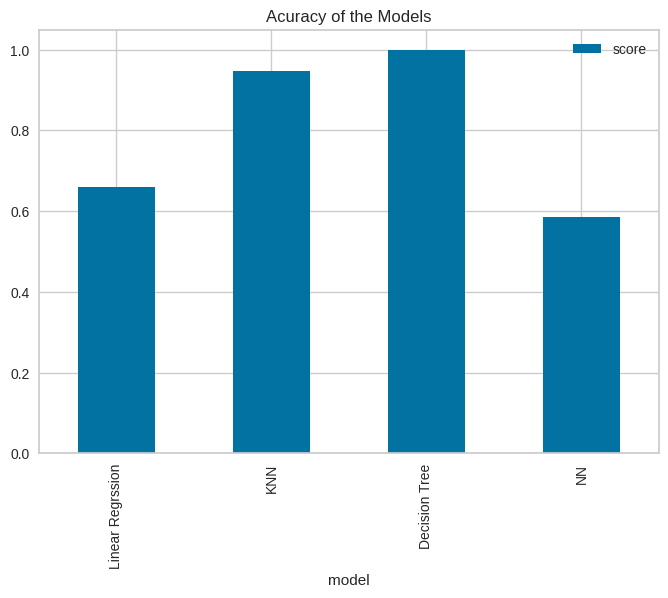

In [249]:
matrix = pd.DataFrame(zip(results, names), columns =['score', 'model'])
matrix['std'] = std
matrix.plot(kind = 'bar', x ='model', y = 'std', title = 'Distribution of The Standard Deviation of the models')
plt.show()
print("\nThe Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model\nDecision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting\nThe KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%")
matrix.plot(kind ='bar', x= 'model', y = 'score', title = 'Acuracy of the Models');

              precision    recall  f1-score   support

      cowrie       0.94      0.98      0.96       535
     dionaea       0.88      0.93      0.91       244
   heralding       0.92      0.89      0.91       200
   honeytrap       0.98      0.97      0.97       561
    suricata       0.96      0.93      0.95       499

    accuracy                           0.95      2039
   macro avg       0.94      0.94      0.94      2039
weighted avg       0.95      0.95      0.95      2039



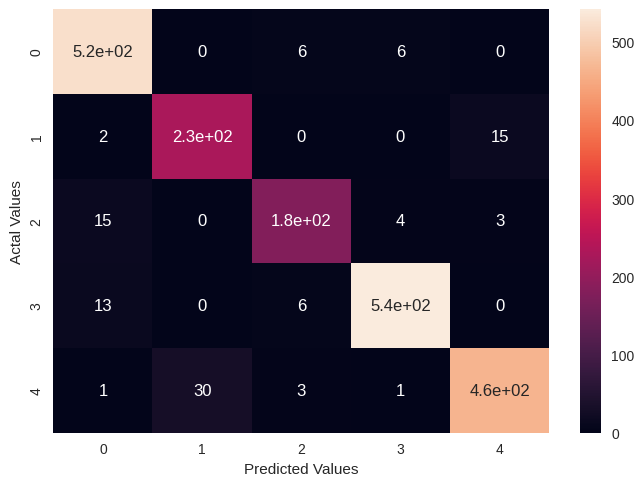

In [248]:
print(classification_report(y_test,y_predict))


KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

